In [1]:
from nilearn import plotting
from nilearn import image
import nilearn
import nibabel as nib
import numpy as np
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img, math_img

subjectDir = "./data/preprocessed/sub-9001/"
sessionDir = "ses-1/"


In [2]:

#returns # of images in time dimension
def imagesinTimeDim (fullImage):
    iterable = image.iter_img(fullImage)
    return sum(1 for _ in iterable)

#plots mask file on specified image background file
def plotMask (maskFile, imageFile, affine=None):
    
    if (affine == None):
        affine = imageFile.affine

    masker = NiftiMasker(mask_img=maskFile, target_affine=affine, standardize=True)
    fmri_masked = masker.fit(imageFile)

    # Generate a report with the mask on normalized image
    report = masker.generate_report()
    return report

def loadSlice (task, indexPosition):
    #load all SLICES of base scans for comparison

    if(task == "arrows"):
        slice = image.index_img(subjectDir + 
        sessionDir + 
        "func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", indexPosition)

    if(task == "faces"):

        slice = image.index_img(subjectDir + 
        sessionDir + 
        "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", indexPosition)

    if(task == "hands"):

        slice = image.index_img(subjectDir + 
        sessionDir + 
        "func/sub-9001_ses-1_task-hands_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", indexPosition)

    if(task == "rest"):

        slice = image.index_img(subjectDir + 
        sessionDir + 
        "func/sub-9001_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", indexPosition)

    if(task == "sleepiness"):

        slice = image.index_img(subjectDir + 
        sessionDir + 
        "func/sub-9001_ses-1_task-sleepiness_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", indexPosition)

    return slice


In [3]:

#load all FULL base scans for comparison (huge amount of memory required, 1 or 2 at a time)

# arrowsFull = image.load_img(subjectDir + 
# sessionDir + 
# "func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")

# facesFull = image.load_img(subjectDir + 
# sessionDir + 
# "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")

# handsFull = image.load_img(subjectDir + 
# sessionDir + 
# "func/sub-9001_ses-1_task-hands_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")

# restFull = image.load_img(subjectDir + 
# sessionDir + 
# "func/sub-9001_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")

# sleepinessFull = image.load_img(subjectDir + 
# sessionDir + 
# "func/sub-9001_ses-1_task-sleepiness_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")



In [4]:

arrowsMaskFile = (subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz")

facesMaskFile = (subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz")
    
handsMaskFile = (subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-hands_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz")
    
restMaskFile = (subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz")
    
sleepinessMaskFile = (subjectDir + 
    sessionDir + 
    "func/sub-9001_ses-1_task-sleepiness_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz")


In [5]:

plotMask(facesMaskFile, loadSlice(task="faces", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,./data/preprocessed/sub-9001/ses-1/func/sub-9001_ses-1_task-faces_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [6]:

plotMask(arrowsMaskFile, loadSlice(task="faces", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,./data/preprocessed/sub-9001/ses-1/func/sub-9001_ses-1_task-arrows_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [7]:

plotMask(sleepinessMaskFile, loadSlice(task="sleepiness", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,./data/preprocessed/sub-9001/ses-1/func/sub-9001_ses-1_task-sleepiness_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [8]:

intersectedFA = nilearn.masking.intersect_masks([facesMaskFile, arrowsMaskFile], threshold=1, connected=True)

#plot intersected mask on faces slice
plotMask(intersectedFA, loadSlice(task="faces", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (104, 123, 81) affine: [[ 1.875 0. 0. -96.5 ] [ 0. 1.875 0. -132.5 ] [ 0. 0. 2.4000001 -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 104 123 81 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : int8 bitpix : 8 slice_start : 0 pixdim : [1. 1.875 1.875 2.4 1. 1. 1. 1. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 1.875 0. 0. -96.5 ] srow_y : [ 0. 1.875 0. -132.5 ] srow_z : [ 0. 0. 2.4 -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [9]:

#standardizing to the affine and shape of sleepiness (as the most restrictive image)

sleepinessSliceAffine = loadSlice(task="sleepiness", indexPosition=0).affine
sleepinessSliceShape = loadSlice(task="sleepiness", indexPosition=0).shape

#then resample all masks using NiftiMasker


In [10]:
#arrows resample
arrowsMaskResamp = NiftiMasker(mask_img=arrowsMaskFile, target_affine=sleepinessSliceAffine, 
target_shape=sleepinessSliceShape, standardize=True)
arrowsMaskResamp.fit()
arrowsMaskResamp.mask_img_.to_filename("sub-9001_ses-1_task-arrows_resamp_mask.nii.gz")
plotMask(arrowsMaskResamp.mask_img_, loadSlice(task="arrows", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (87, 103, 65) affine: [[ 2.25 0. 0. -96.5 ] [ 0. 2.25 0. -132.5 ] [ 0. 0. 3. -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 87 103 65 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 2.25 2.25 3. 1. 1. 1. 1. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 2.25 0. 0. -96.5 ] srow_y : [ 0. 2.25 0. -132.5 ] srow_z : [ 0. 0. 3. -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [11]:
#faces resample
facesMaskResamp = NiftiMasker(mask_img=facesMaskFile, target_affine=sleepinessSliceAffine, 
target_shape=sleepinessSliceShape, standardize=True)
facesMaskResamp.fit()
facesMaskResamp.mask_img_.to_filename("sub-9001_ses-1_task-faces_resamp_mask.nii.gz")
plotMask(facesMaskResamp.mask_img_, loadSlice(task="faces", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (87, 103, 65) affine: [[ 2.25 0. 0. -96.5 ] [ 0. 2.25 0. -132.5 ] [ 0. 0. 3. -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 87 103 65 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 2.25 2.25 3. 1. 1. 1. 1. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 2.25 0. 0. -96.5 ] srow_y : [ 0. 2.25 0. -132.5 ] srow_z : [ 0. 0. 3. -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [12]:
#hands resample
handsMaskResamp = NiftiMasker(mask_img=handsMaskFile, target_affine=sleepinessSliceAffine, 
target_shape=sleepinessSliceShape, standardize=True)
handsMaskResamp.fit()
handsMaskResamp.mask_img_.to_filename("sub-9001_ses-1_task-hands_resamp_mask.nii.gz")
plotMask(handsMaskResamp.mask_img_, loadSlice(task="hands", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (87, 103, 65) affine: [[ 2.25 0. 0. -96.5 ] [ 0. 2.25 0. -132.5 ] [ 0. 0. 3. -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 87 103 65 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 2.25 2.25 3. 1. 1. 1. 1. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 2.25 0. 0. -96.5 ] srow_y : [ 0. 2.25 0. -132.5 ] srow_z : [ 0. 0. 3. -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [13]:
#rest resample
restMaskResamp = NiftiMasker(mask_img=restMaskFile, target_affine=sleepinessSliceAffine, 
target_shape=sleepinessSliceShape, standardize=True)
restMaskResamp.fit()
restMaskResamp.mask_img_.to_filename("sub-9001_ses-1_task-rest_resamp_mask.nii.gz")
plotMask(restMaskResamp.mask_img_, loadSlice(task="rest", indexPosition=0))


Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (87, 103, 65) affine: [[ 2.25 0. 0. -96.5 ] [ 0. 2.25 0. -132.5 ] [ 0. 0. 3. -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'r' dim_info : 0 dim : [ 3 87 103 65 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 2.25 2.25 3. 0. 0. 0. 0. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 2 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.2.5).' aux_file : b'' qform_code : mni sform_code : mni quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 2.25 0. 0. -96.5 ] srow_y : [ 0. 2.25 0. -132.5 ] srow_z : [ 0. 0. 3. -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [14]:
#sleepiness resample
sleepinessMaskResamp = NiftiMasker(mask_img=sleepinessMaskFile, target_affine=sleepinessSliceAffine, 
target_shape=sleepinessSliceShape, standardize=True)
sleepinessMaskResamp.fit()
sleepinessMaskResamp.mask_img_.to_filename("sub-9001_ses-1_task-sleepiness_resamp_mask.nii.gz")
plotMask(sleepinessMaskResamp.mask_img_, loadSlice(task="sleepiness", indexPosition=0))



Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (87, 103, 65) affine: [[ 2.25 0. 0. -96.5 ] [ 0. 2.25 0. -132.5 ] [ 0. 0. 3. -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'r' dim_info : 0 dim : [ 3 87 103 65 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 2.25 2.25 3. 0. 0. 0. 0. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 2 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.2.5).' aux_file : b'' qform_code : mni sform_code : mni quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 2.25 0. 0. -96.5 ] srow_y : [ 0. 2.25 0. -132.5 ] srow_z : [ 0. 0. 3. -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


In [15]:

resampledMasks = [arrowsMaskResamp.mask_img_, facesMaskResamp.mask_img_,
 handsMaskResamp.mask_img_, restMaskResamp.mask_img_, sleepinessMaskResamp.mask_img_]

#calculate interset of the masks. threshold = 1 means intersection, not union
intersectedMask = nilearn.masking.intersect_masks(resampledMasks, threshold=1, connected=True)

#plot intersected mask on sleepiness slice
plotMask(intersectedMask, loadSlice(task="sleepiness", indexPosition=0))



Parameter,Value
detrend,False
dtype,None
high_pass,None
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (87, 103, 65) affine: [[ 2.25 0. 0. -96.5 ] [ 0. 2.25 0. -132.5 ] [ 0. 0. 3. -78.5 ] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 87 103 65 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : int8 bitpix : 8 slice_start : 0 pixdim : [1. 2.25 2.25 3. 1. 1. 1. 1. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -96.5 qoffset_y : -132.5 qoffset_z : -78.5 srow_x : [ 2.25 0. 0. -96.5 ] srow_y : [ 0. 2.25 0. -132.5 ] srow_z : [ 0. 0. 3. -78.5] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1
reports,True


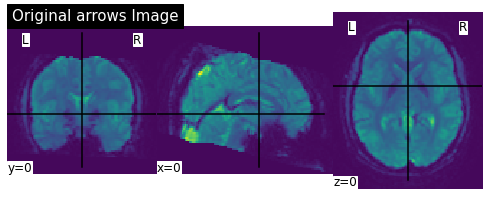

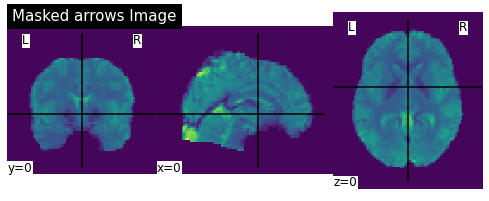

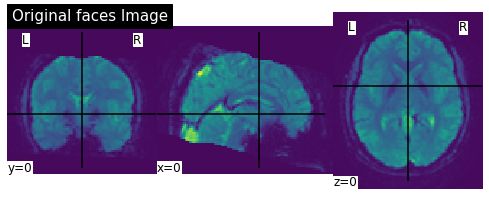

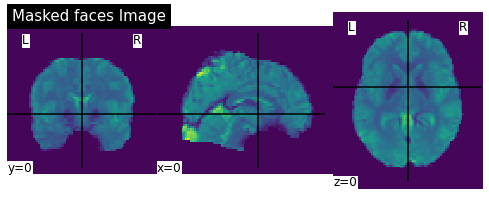

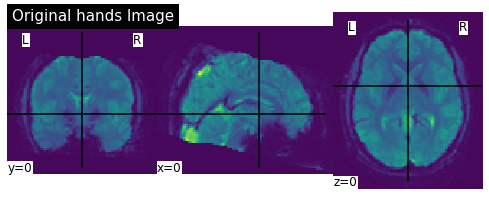

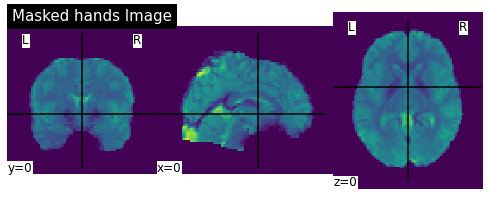

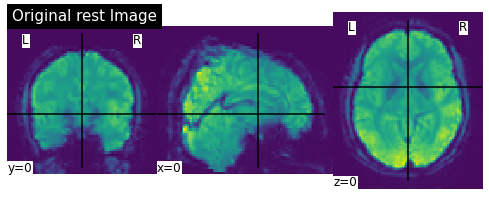

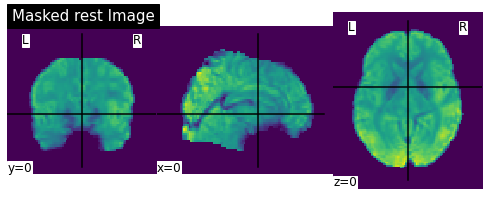

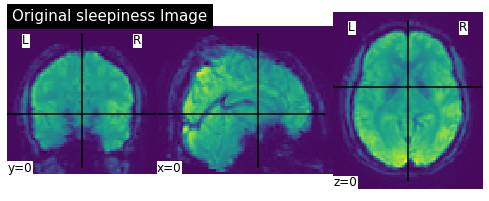

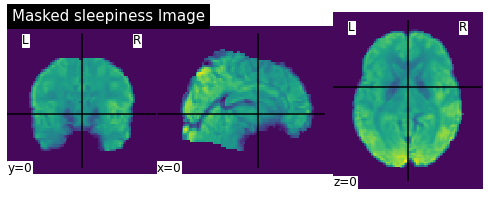

In [21]:

#cropping/applying mask on image attempt for each task

#arrows
cropMask = NiftiMasker(mask_img=intersectedMask, standardize=True)
#fitted = cropMask.fit(loadSlice(task="arrows", indexPosition=0))
#maskedArray = cropMask.transform(loadSlice(task="arrows", indexPosition=0))
#above 2 lines replaced by "fit_transform"
maskedArray = cropMask.fit_transform(loadSlice(task="arrows", indexPosition=0))
arrowsCrop = cropMask.inverse_transform(X=maskedArray)

plt = nilearn.plotting.plot_img(loadSlice("arrows", 0), cut_coords=[0,0,0], title="Original arrows Image")
#plt.savefig('./plots/masking/Original arrows Image.png')
#plt.close()
plt = nilearn.plotting.plot_img(arrowsCrop, cut_coords=[0,0,0], title="Masked arrows Image")
#plt.savefig('./plots/masking/Masked arrows Image.png')
#plt.close()

#faces
cropMask = NiftiMasker(mask_img=intersectedMask, standardize=True)
#fitted = cropMask.fit(loadSlice(task="faces", indexPosition=0))
#maskedArray = cropMask.transform(loadSlice(task="faces", indexPosition=0))
#above 2 lines replaced by "fit_transform"
maskedArray = cropMask.fit_transform(loadSlice(task="faces", indexPosition=0))
facesCrop = cropMask.inverse_transform(X=maskedArray)

plt = nilearn.plotting.plot_img(loadSlice("faces", 0), cut_coords=[0,0,0], title="Original faces Image")
#plt.savefig('./plots/masking/Original faces Image.png')
#plt.close()
plt = nilearn.plotting.plot_img(facesCrop, cut_coords=[0,0,0], title="Masked faces Image")
#plt.savefig('./plots/masking/Masked faces Image.png')
#plt.close()

#hands
cropMask = NiftiMasker(mask_img=intersectedMask, standardize=True)
#fitted = cropMask.fit(loadSlice(task="hands", indexPosition=0))
#maskedArray = cropMask.transform(loadSlice(task="hands", indexPosition=0))
#above 2 lines replaced by "fit_transform"
maskedArray = cropMask.fit_transform(loadSlice(task="hands", indexPosition=0))
handsCrop = cropMask.inverse_transform(X=maskedArray)

plt = nilearn.plotting.plot_img(loadSlice("hands", 0), cut_coords=[0,0,0], title="Original hands Image")
#plt.savefig('./plots/masking/Original hands Image.png')
#plt.close()
plt = nilearn.plotting.plot_img(handsCrop, cut_coords=[0,0,0], title="Masked hands Image")
#plt.savefig('./plots/masking/Masked hands Image.png')
#plt.close()

#rest
cropMask = NiftiMasker(mask_img=intersectedMask, standardize=True)
#fitted = cropMask.fit(loadSlice(task="rest", indexPosition=0))
#maskedArray = cropMask.transform(loadSlice(task="rest", indexPosition=0))
#above 2 lines replaced by "fit_transform"
maskedArray = cropMask.fit_transform(loadSlice(task="rest", indexPosition=0))
restCrop = cropMask.inverse_transform(X=maskedArray)

plt = nilearn.plotting.plot_img(loadSlice("rest", 0), cut_coords=[0,0,0], title="Original rest Image")
#plt.savefig('./plots/masking/Original rest Image.png')
#plt.close()
plt = nilearn.plotting.plot_img(restCrop, cut_coords=[0,0,0], title="Masked rest Image")
#plt.savefig('./plots/masking/Masked rest Image.png')
#plt.close()

#sleepiness
cropMask = NiftiMasker(mask_img=intersectedMask, standardize=True)
#fitted = cropMask.fit(loadSlice(task="sleepiness", indexPosition=0))
#maskedArray = cropMask.transform(loadSlice(task="sleepiness", indexPosition=0))
#above 2 lines replaced by "fit_transform"
maskedArray = cropMask.fit_transform(loadSlice(task="sleepiness", indexPosition=0))
sleepinessCrop = cropMask.inverse_transform(X=maskedArray)

plt = nilearn.plotting.plot_img(loadSlice("sleepiness", 0), cut_coords=[0,0,0], title="Original sleepiness Image")
#plt.savefig('./plots/masking/Original sleepiness Image.png')
#plt.close()
plt = nilearn.plotting.plot_img(sleepinessCrop, cut_coords=[0,0,0], title="Masked sleepiness Image")
#plt.savefig('./plots/masking/Masked sleepiness Image.png')
#plt.close()





